# Unemployment/Labor Force Participation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Import Democracy Data

In [3]:
dem: pd.DataFrame = pd.read_hdf("data/democracy.h5", "democracy")

## Read Unemployment

In [4]:
unemployment = pd.read_csv("data/unemployment.csv", skiprows=[0, 1, 2, 3], index_col=0).drop(["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 65"], axis=1)
unemployment.columns = unemployment.columns.astype(int)
unemployment = unemployment.unstack().to_frame("unemployment").reorder_levels([1, 0])
unemployment.index.set_names(["country_name", "year"], inplace=True)
unemployment.sort_index(inplace=True)
unemployment

unemployment
country_name year              
Afghanistan  1960           NaN
             1961           NaN
             1962           NaN
             1963           NaN
             1964           NaN
...                         ...
Zimbabwe     2016          5.24
             2017          5.15
             2018          5.07
             2019          5.02
             2020          5.73

[16226 rows x 1 columns]

## Read Labour Force Participation


In [5]:
labor = pd.read_csv("data/labor_force_participation.csv", skiprows=[0, 1, 2, 3], index_col=0).drop(["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 65"], axis=1)
labor.columns = labor.columns.astype(int)
labor = labor.unstack().to_frame("participation").reorder_levels([1, 0])
labor.index.set_names(["country_name", "year"], inplace=True)
labor.sort_index(inplace=True)
labor

participation
country_name year               
Afghanistan  1960            NaN
             1961            NaN
             1962            NaN
             1963            NaN
             1964            NaN
...                          ...
Zimbabwe     2016          83.99
             2017          84.01
             2018          83.97
             2019          83.98
             2020            NaN

[16226 rows x 1 columns]

## LinReg Unemployment

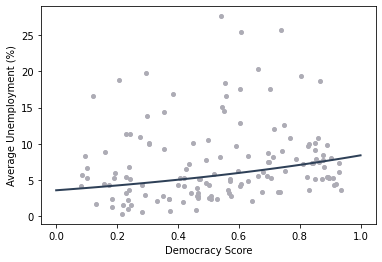

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           unemployment   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     11.34
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           0.000984
Time:                        12:57:37   Log-Likelihood:                -156.83
No. Observations:                 141   AIC:                             317.7
Df Residuals:                     139   BIC:                             323.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2766      0.150      8.516      0.000       0.980       1.573
score          0.8527      0.253      3.367      0.001       0.352       1.354
==============================================================================
Omnibus:                        5.356   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.382
Skew:                          -0.313   Prob(JB):                       0.0678
Kurtosis:                       3.724   Cond. No.                         5.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
dem_ump = dem.join(unemployment).dropna()
dem_ump = dem_ump.groupby(dem_ump.index.get_level_values(0)).mean()
model = sm.OLS(np.log(dem_ump["unemployment"]), sm.add_constant(dem_ump["score"]))
res = model.fit()
plt.scatter(dem_ump["score"], dem_ump["unemployment"], 16, marker="o", color="#ADACB5")
x = np.linspace(0, 1)
plt.plot(x, np.exp(res.params[0] + res.params[1] * x), linewidth=2, color="#2E4057")
plt.xlabel("Democracy Score")
plt.ylabel("Average Unemployment (%)")
plt.show()
res.summary()

## LinReg Labor

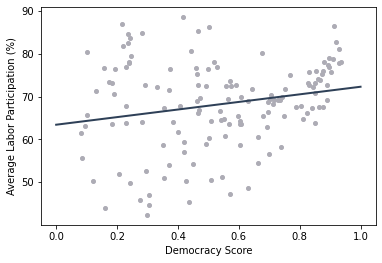

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          participation   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     6.682
Date:                Mon, 31 Jan 2022   Prob (F-statistic):             0.0108
Time:                        12:58:31   Log-Likelihood:                -524.40
No. Observations:                 141   AIC:                             1053.
Df Residuals:                     139   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.4078      2.032     31.201      0.000      59.390      67.426
score          8.8758      3.434      2.585      0.011       2.087      15.665
==============================================================================
Omnibus:                        1.332   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.404
Skew:                          -0.221   Prob(JB):                        0.496
Kurtosis:                       2.793   Cond. No.                         5.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
dem_lab = dem.join(labor).dropna()
dem_lab = dem_lab.groupby(dem_lab.index.get_level_values(0)).mean()
model = sm.OLS(dem_lab["participation"], sm.add_constant(dem_lab["score"]))
res = model.fit()
plt.scatter(dem_lab["score"], dem_lab["participation"], 16, marker="o", color="#ADACB5")
x = np.linspace(0, 1)
plt.plot(x, res.params[0] + res.params[1] * x, linewidth=2, color="#2E4057")
plt.xlabel("Democracy Score")
plt.ylabel("Average Labor Participation (%)")
plt.show()
res.summary()

## Unemployment Over Time

In [8]:
dem_raw = pd.read_hdf("data/democracy.h5", "democracy_raw")["v-dem-score"].to_frame()
unemployment_dem = unemployment.join(dem_raw)
labor_dem = labor.join(dem_raw)
display(unemployment_dem, labor_dem)

unemployment  v-dem-score
country_name year                           
Afghanistan  1960           NaN       0.0608
             1961           NaN       0.0614
             1962           NaN       0.0614
             1963           NaN       0.0664
             1964           NaN       0.0908
...                         ...          ...
Zimbabwe     2016          5.24       0.2186
             2017          5.15       0.2290
             2018          5.07       0.2276
             2019          5.02       0.2132
             2020          5.73       0.2100

[16226 rows x 2 columns]

participation  v-dem-score
country_name year                            
Afghanistan  1960            NaN       0.0608
             1961            NaN       0.0614
             1962            NaN       0.0614
             1963            NaN       0.0664
             1964            NaN       0.0908
...                          ...          ...
Zimbabwe     2016          83.99       0.2186
             2017          84.01       0.2290
             2018          83.97       0.2276
             2019          83.98       0.2132
             2020            NaN       0.2100

[16226 rows x 2 columns]

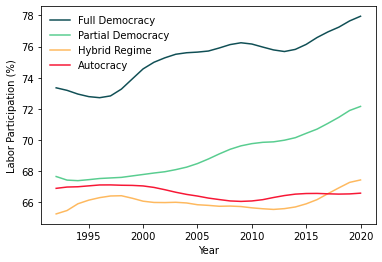

In [39]:
bins = pd.cut(labor_dem["v-dem-score"], bins=[0, 0.4, 0.6, 0.8, 1])
labor_dem_time = labor_dem.groupby([bins, "year"]).mean()["participation"].reorder_levels([1, 0]).sort_index().unstack()
labor_dem_time = labor_dem_time.ewm(span=5).mean().rolling(3).mean()
labor_dem_time = labor_dem_time.reindex(sorted(labor_dem_time.columns, reverse=True), axis=1)

colors = ["#104F55", "#59CD90", "#FEB95F", "#F71735"]
plt.gca().set_prop_cycle(color=colors)
plt.plot(labor_dem_time)
plt.legend(labor_dem_time.columns)
plt.xlabel("Year")
plt.ylabel("Labor Participation (%)")
plt.legend(["Full Democracy", "Partial Democracy", "Hybrid Regime", "Autocracy"], frameon=False)
plt.show()

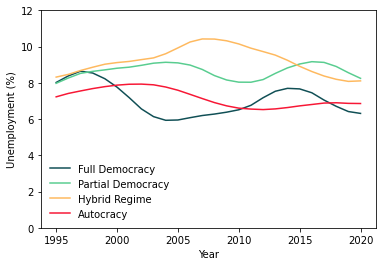

In [45]:
bins = pd.cut(unemployment_dem["v-dem-score"], bins=[0, 0.4, 0.6, 0.8, 1])
unemployment_dem_time = unemployment_dem.groupby([bins, "year"]).mean()["unemployment"].reorder_levels([1, 0]).sort_index().unstack()
unemployment_dem_time = unemployment_dem_time.ewm(span=5).mean().rolling(5).mean()
unemployment_dem_time = unemployment_dem_time.reindex(sorted(unemployment_dem_time.columns, reverse=True), axis=1)


colors = ["#104F55", "#59CD90", "#FEB95F", "#F71735"]
plt.gca().set_prop_cycle(color=colors)
plt.plot(unemployment_dem_time)
plt.legend(unemployment_dem_time.columns)
plt.xlabel("Year")
plt.ylabel("Unemployment (%)")
plt.ylim([0, 12])
plt.legend(["Full Democracy", "Partial Democracy", "Hybrid Regime", "Autocracy"], frameon=False)
plt.show()